In [1]:
!pip install typeguard
!git clone https://github.com/NVlabs/stylegan.git
%cd stylegan
!git clone https://github.com/kylemcdonald/python-utils.git utils

Cloning into 'stylegan'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.
/content/stylegan
Cloning into 'utils'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 169 (delta 39), reused 45 (delta 19), pack-reused 94
Receiving objects: 100% (169/169), 42.16 KiB | 539.00 KiB/s, done.
Resolving deltas: 100% (83/83), done.


In [2]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

from utils.imutil import imshow, imresize
from utils.mosaic import make_mosaic

tflib.init_tf()

# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0.0


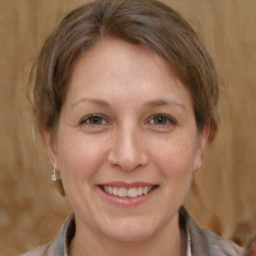

0.05263157894736842


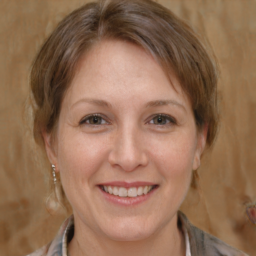

0.10526315789473684


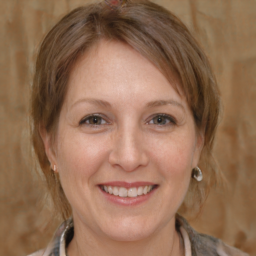

0.15789473684210525


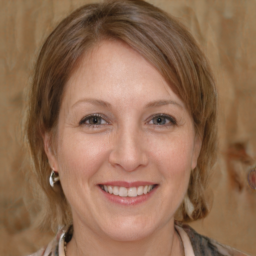

0.21052631578947367


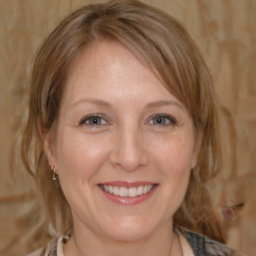

0.2631578947368421


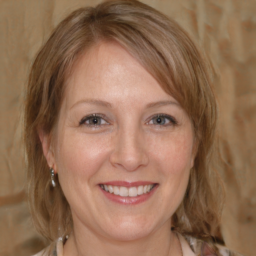

0.3157894736842105


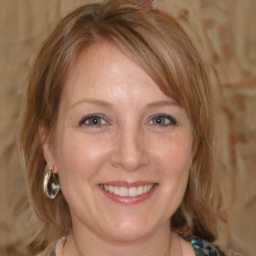

0.3684210526315789


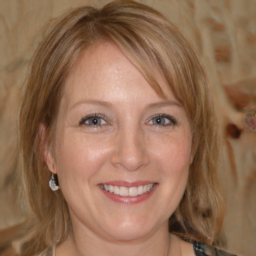

0.42105263157894735


In [0]:
# Pick latent vector.
latents = np.random.randn(1, Gs.input_shape[1])

# Generate image.
all = []
for i in np.linspace(0,1,20):
  print(i)
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latents, None, truncation_psi=i, randomize_noise=True, output_transform=fmt)
  all.append(imresize(images[0], max_side=256)) # comment this out for higher resimages[0])
  imshow(all[-1])

In [0]:
mosaic = make_mosaic(np.asarray(all))
imshow(mosaic, retina=True, fmt='jpg')